![trainers in a store](trainers.jpg)

Sports clothing and athleisure attire is a huge industry, worth approximately [$193 billion in 2021](https://www.statista.com/statistics/254489/total-revenue-of-the-global-sports-apparel-market/) with a strong growth forecast over the next decade! 

In this notebook, you will undertake the role of a product analyst for an online sports clothing company. The company is specifically interested in how it can improve revenue. You will dive into product data such as pricing, reviews, descriptions, and ratings, as well as revenue and website traffic, to produce recommendations for its marketing and sales teams.  

You've been provided with four datasets to investigate:

#  brands.csv

| Columns | Description |
|---------|-------------|
| `product_id` | Unique product identifier |
| `brand` | Brand of the product | 

# finance.csv

| Columns | Description |
|---------|-------------|
| `product_id` | Unique product identifier |
| `listing_price` | Original price of the product | 
| `sale_price` | Discounted price of the product |
| `discount` | Discount off the listing price, as a decimal | 
| `revenue` | Revenue generated by the product |

# info.csv

| Columns | Description |
|---------|-------------|
| `product_name` | Name of the product | 
| `product_id` | Unique product identifier |
| `description` | Description of the product |

# reviews.csv

| Columns | Description |
|---------|-------------|
| `product_id` | Unique product identifier |
| `rating` | Average product rating | 
| `reviews` | Number of reviews for the product |

# OBJECTIVES

The primary objective of this case study is to investigate key aspects of the two company’s (Adidas &
Nike) product offerings and consumer interactions to identify opportunities for revenue enhancement.
Specifically, the report aims to:

## 1. Analyse Revenue Distribution for Adidas and Nike Products: By segmenting products based on
listing price quartiles, the report will assess the volume of products and average revenue for Adidas
and Nike, two leading brands in the sports clothing industry. This analysis aims to uncover insights
into the pricing strategies and revenue potential of these brands.

## 2. Examine Relationship between Product Description Length and Ratings: The report will explore
potential differences between the word count of product descriptions and their average ratings. This
analysis seeks to ascertain whether there is a correlation between the comprehensiveness of product
descriptions and consumer satisfaction, as reflected in product ratings.

## 3. Predict Revenue Based on Available Information: The report will explore the feasibility of predicting
revenue based on the provided dataset. By leveraging machine learning models, the analysis aims
to identify significant predictors of revenue and assess the predictive power of the available
information. This predictive capability can offer valuable insights for revenue forecasting and
facilitate data-driven decision-making processes.

In [27]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
brands = pd.read_csv("D:\\MS BAnDS\\Spring 2024\\Predictive Analytics\\CASE 1\\data\\brands.csv") 
finance = pd.read_csv("D:\\MS BAnDS\\Spring 2024\\Predictive Analytics\\CASE 1\\data\\finance.csv")
info = pd.read_csv("D:\\MS BAnDS\\Spring 2024\\Predictive Analytics\\CASE 1\\data\\info.csv")
reviews = pd.read_csv("D:\\MS BAnDS\\Spring 2024\\Predictive Analytics\\CASE 1\\data\\reviews.csv")

In [6]:
print(reviews.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3179 entries, 0 to 3178
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   product_id  3179 non-null   object 
 1   rating      3120 non-null   float64
 2   reviews     3120 non-null   float64
dtypes: float64(2), object(1)
memory usage: 74.6+ KB
None


### Reviews Table

This table contains approximately 3180 entries and includes fields for product ID, numerical rating, and the count of reviews for each product. It serves as a repository for evaluating product performance based on user feedback.

In [5]:
print(info.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3179 entries, 0 to 3178
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_name  3120 non-null   object
 1   product_id    3179 non-null   object
 2   description   3117 non-null   object
dtypes: object(3)
memory usage: 74.6+ KB
None


### Info Table
With around 3117 non null entries for 3179 product id values, the info table holds crucial details about each product, such as the product name, product ID, and a description. This table provides essential context and information about the products in our database.

In [7]:
print(finance.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3179 entries, 0 to 3178
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_id     3179 non-null   object 
 1   listing_price  3120 non-null   float64
 2   sale_price     3120 non-null   float64
 3   discount       3120 non-null   float64
 4   revenue        3120 non-null   float64
dtypes: float64(4), object(1)
memory usage: 124.3+ KB
None


### Finance Table

The finance table comprises of 3179 entries, out of which 3120 entries have non-null values giving information about financial data related to the products. It includes information like listing price, sales price, discount, and revenue, facilitating financial analysis and tracking of product profitability.

In [8]:
print(brands.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3179 entries, 0 to 3178
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  3179 non-null   object
 1   brand       3120 non-null   object
dtypes: object(2)
memory usage: 49.8+ KB
None


### Brand Table

Finally, the brands table, also containing 3179 entries, links each product to its respective brand name. This table allows for
easy categorization and identification of products based on their brands.

In [9]:
finance['listing_price'].value_counts()

listing_price
0.00     354
79.99    322
59.99    211
49.99    183
55.99    174
        ... 
78.95      1
64.95      1
47.95      1
39.95      1
94.95      1
Name: count, Length: 78, dtype: int64

In [10]:
# Add a column brand to finance data frame
finance = pd.merge(finance, brands[['product_id', 'brand']], on='product_id', how='left')

In [11]:
finance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3179 entries, 0 to 3178
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_id     3179 non-null   object 
 1   listing_price  3120 non-null   float64
 2   sale_price     3120 non-null   float64
 3   discount       3120 non-null   float64
 4   revenue        3120 non-null   float64
 5   brand          3120 non-null   object 
dtypes: float64(4), object(2)
memory usage: 149.1+ KB


In [12]:
finance.dropna(inplace=True)

In [13]:
finance.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3120 entries, 1 to 3178
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_id     3120 non-null   object 
 1   listing_price  3120 non-null   float64
 2   sale_price     3120 non-null   float64
 3   discount       3120 non-null   float64
 4   revenue        3120 non-null   float64
 5   brand          3120 non-null   object 
dtypes: float64(4), object(2)
memory usage: 170.6+ KB


In [14]:
finance['brand'].unique()

array(['Adidas', 'Nike'], dtype=object)

In [15]:
# Filter finance DataFrame to create nike DataFrame
nike = finance[finance['brand'] == 'Nike']

# Filter finance DataFrame to create adidas DataFrame
adidas = finance[finance['brand'] == 'Adidas']

In [16]:
nike.head()

,product_id,listing_price,sale_price,discount,revenue,brand
2625,CJ1646-600,0.0,74.95,0.0,0.0,Nike
2626,CT4328-101,0.0,74.95,0.0,0.0,Nike
2627,CI3482-200,0.0,99.95,0.0,0.0,Nike
2628,CD0479-200,0.0,99.95,0.0,0.0,Nike
2629,CZ6156-101,0.0,99.95,0.0,0.0,Nike


In [17]:
nike.describe()

,listing_price,sale_price,discount,revenue
count,545.000000,545.000000,545.0,545.000000
mean,41.343945,102.175817,0.0,1472.079376
std,60.770722,42.763437,0.0,4054.088455
min,0.000000,15.950000,0.0,0.000000
25%,0.000000,71.970000,0.0,0.000000
50%,0.000000,99.950000,0.0,287.820000
75%,89.950000,127.970000,0.0,1151.640000
max,199.950000,365.000000,0.0,64203.930000


In [18]:
adidas.head()

,product_id,listing_price,sale_price,discount,revenue,brand
1,G27341,75.99,37.99,0.5,1641.17,Adidas
2,CM0081,9.99,5.99,0.4,398.93,Adidas
3,B44832,69.99,34.99,0.5,2204.37,Adidas
4,D98205,79.99,39.99,0.5,5182.70,Adidas
5,B75586,47.99,19.20,0.6,1555.20,Adidas


In [19]:
adidas.describe()

,listing_price,sale_price,discount,revenue
count,2575.000000,2575.000000,2575.000000,2575.000000
mean,75.725146,51.198311,0.334524,4476.356924
std,40.531441,35.880653,0.204363,4340.528423
min,8.990000,4.490000,0.000000,0.000000
25%,49.990000,27.990000,0.000000,1554.930000
50%,65.990000,39.990000,0.400000,3337.740000
75%,89.990000,64.990000,0.500000,5795.155000
max,299.990000,299.990000,0.600000,37150.450000


Nike has a lot of products witht he listing price of 0.0, hence, we will separate the products with listing prie of 0.0 from the data set.

In [44]:
nike_0 = nike[nike["listing_price"] == 0.0]
nike_1 = nike[nike["listing_price"] != 0.0]

In [45]:
# Make quartiles based on nike 1
nike_1_quartiles = np.percentile(nike_1['listing_price'], [25, 50, 75])
print(nike_1_quartiles)

[ 87.45 119.95 159.95]


In [46]:
# Adidas Quartiles
adidas_quartiles = np.percentile(adidas['listing_price'], [25, 50, 75])
print(adidas_quartiles)

[49.99 65.99 89.99]


In [47]:
# Define bin edges based on quartiles
nike_bin_edges = [nike_1['listing_price'].min()] + nike_1_quartiles.tolist() + [nike_1['listing_price'].max()]
adidas_bin_edges = [adidas['listing_price'].min()] + adidas_quartiles.tolist() + [adidas['listing_price'].max()]

# Define bin labels
bin_labels = ['Budget', 'Average', 'Expensive', 'Elite']

In [49]:
# Create bins and label them for the adidas DataFrame
adidas['budget'] = pd.cut(adidas['listing_price'], bins=adidas_bin_edges, labels=bin_labels)

adidas.head(10)


C:\Users\HP\AppData\Local\Temp\ipykernel_8972\3710232321.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adidas['budget'] = pd.cut(adidas['listing_price'], bins=adidas_bin_edges, labels=bin_labels)


,product_id,listing_price,sale_price,discount,revenue,brand,budget
1,G27341,75.99,37.99,0.5,1641.17,Adidas,Expensive
2,CM0081,9.99,5.99,0.4,398.93,Adidas,Budget
3,B44832,69.99,34.99,0.5,2204.37,Adidas,Expensive
4,D98205,79.99,39.99,0.5,5182.70,Adidas,Expensive
5,B75586,47.99,19.20,0.6,1555.20,Adidas,Budget
6,CG4051,47.99,23.99,0.5,86.36,Adidas,Budget
7,CM0080,9.99,5.99,0.4,75.47,Adidas,Budget
8,B75990,55.99,27.99,0.5,806.11,Adidas,Average
9,EE5761,65.99,39.59,0.4,2779.22,Adidas,Average
10,EE4553,75.99,45.59,0.4,2954.23,Adidas,Expensive


In [51]:
# Step 4: Assign bins to non-zero prices
nike_1['budget'] = pd.cut(nike_1['listing_price'], bins=nike_bin_edges, labels=bin_labels, include_lowest=True)

# Step 5: Assign 'Budget' for zero listing prices
nike_0['budget'] = 'Budget'

# Step 6: Combine the two DataFrames
nike = pd.concat([nike_0, nike_1], ignore_index=True)

# Optional: Verify by checking the head of the dataframe
nike.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_8972\546508716.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nike_1['budget'] = pd.cut(nike_1['listing_price'], bins=nike_bin_edges, labels=bin_labels, include_lowest=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_8972\546508716.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nike_0['budget'] = 'Budget'


,product_id,listing_price,sale_price,discount,revenue,brand,budget
0,CJ1646-600,0.0,74.95,0.0,0.0,Nike,Budget
1,CT4328-101,0.0,74.95,0.0,0.0,Nike,Budget
2,CI3482-200,0.0,99.95,0.0,0.0,Nike,Budget
3,CD0479-200,0.0,99.95,0.0,0.0,Nike,Budget
4,CZ6156-101,0.0,99.95,0.0,0.0,Nike,Budget


In [55]:
result_adidas = adidas.groupby('budget').agg({'revenue': ['mean', 'count']}).reset_index()
# Rename the columns for clarity
result_adidas.columns = ['budget', 'average_revenue', 'product_count']

print(result_adidas)

      budget  average_revenue  product_count
0     Budget      2256.142519            798
1    Average      3261.107992            533
2  Expensive      4746.983476            656
3      Elite      8302.784804            587


C:\Users\HP\AppData\Local\Temp\ipykernel_8972\1212032374.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result_adidas = adidas.groupby('budget').agg({'revenue': ['mean', 'count']}).reset_index()


In [53]:
result_nike = nike.groupby('budget').agg({'revenue': ['mean', 'count']}).reset_index()
# Rename the columns for clarity
result_nike.columns = ['brand', 'budget', 'average_revenue', 'product_count']

print(result_nike)

      budget  average_revenue  product_count
0    Average       942.394098             61
1     Budget      1533.138383            402
2      Elite      1427.153810             21
3  Expensive      1614.841967             61


In this analysis, products from Adidas and Nike were categorized into four tiers based on their list price
quartiles:
• Budget: Products priced up to quartile one
• Average: Products priced up to quartile two
• Expensive: Products priced up to quartile three
• Elite: Products priced up to quartile four
To facilitate our comparison, we constructed a pandas DataFrame named adidas_vs_nike, which contains
the following columns: brand, price_label, num_products, and mean_revenue. The distribution of products
from Adidas and Nike across these categories is depicted below, showcasing the average revenue and number
of products for each tier.



### Examining the Relationship between Product Description Length and Ratings
In our analysis of the relationship between product description length and rating, we aimed to unravel the connection between average ratings and the volume of reviews. Initially, we segmented product descriptions into bins of 100 characters each, introducing a new column named 'description_length'. By employing grouping and aggregation techniques, we computed the mean rating and average number of reviews for each description length bin. To enhance clarity and simplify interpretation, we rounded all numeric values to two decimal places and renamed the columns to 'description_length', 'mean_rating', and 'num_reviews'. This dataset furnishes invaluable insights into how the length of product descriptions intersects with customer perceptions, thereby facilitating strategic decision-making regarding product descriptions and marketing approaches. Our analysis underscores the pivotal role of concise yet informative product descriptions in shaping customer feedback and engagement.

In [20]:
# Merge info and reviews on 'product_id'
merged_df = pd.merge(info, reviews, on='product_id')

In [24]:
# Calculate description length
merged_df['description_length'] = merged_df['description'].str.len()

In [28]:
merged_df.head()

,product_name,product_id,description,rating,reviews,description_length
0,NaN,AH2430,NaN,NaN,NaN,NaN
1,Women's adidas Originals Sleek Shoes,G27341,"A modern take on adidas sport heritage, tailor...",3.3,24.0,175.0
2,Women's adidas Swim Puka Slippers,CM0081,These adidas Puka slippers for women's come wi...,2.6,37.0,172.0
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,"Inspired by modern tech runners, these women's...",4.1,35.0,264.0
4,Women's adidas Originals Taekwondo Shoes,D98205,This design is inspired by vintage Taekwondo s...,3.5,72.0,288.0


In [33]:
# Bin description lengths
merged_df['length_bin'] = pd.cut(merged_df['description_length'], bins=10)

In [37]:
# Group by bin: average rating, total reviews
grouped = merged_df.groupby('length_bin').agg({
    'rating': 'mean',
    'reviews': 'mean'  # total reviews per bin
}).reset_index()

C:\Users\HP\AppData\Local\Temp\ipykernel_8972\1026140870.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = merged_df.groupby('length_bin').agg({


In [38]:
# Midpoint of bins for X-axis
grouped['bin_mid'] = grouped['length_bin'].apply(lambda x: x.mid)

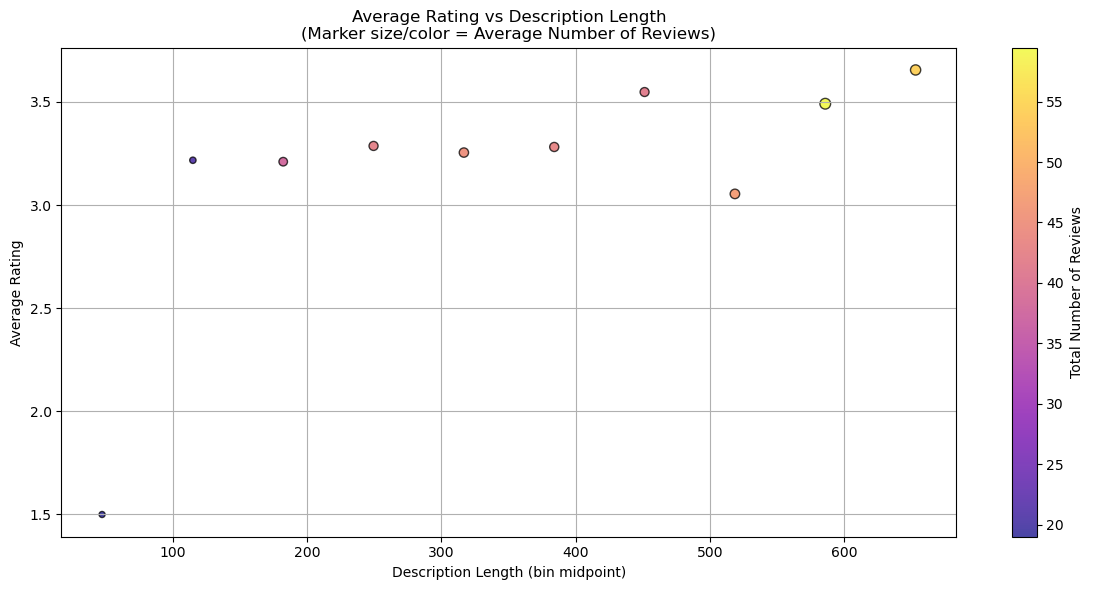

In [40]:
# Plot
plt.figure(figsize=(12, 6))
scatter = plt.scatter(
    grouped['bin_mid'],
    grouped['rating'],
    s=grouped['reviews'],  # Marker size = total reviews
    c=grouped['reviews'],  # Marker color = total reviews
    cmap='plasma',
    alpha=0.75,
    edgecolor='k'
)

plt.colorbar(scatter, label='Total Number of Reviews')
plt.xlabel('Description Length (bin midpoint)')
plt.ylabel('Average Rating')
plt.title('Average Rating vs Description Length\n(Marker size/color = Average Number of Reviews)')
plt.grid(True)
plt.tight_layout()
plt.show()

To visually portray this relationship, we've crafted a scatter plot showcasing the interplay between the length of product descriptions and two pivotal customer feedback metrics: mean rating and the number of reviews. Each data point on the plot represents a specific description length bin. The x-axis illustrates thelength of the description, while the y-axis depicts the mean rating. The size of each point corresponds to the number of reviews associated with that description length, with larger points denoting higher review counts. Additionally, the color gradient of the points signifies the volume of reviews, with darker shades indicative of a greater number of reviews. The plot reveals a discernible trend where an increase in description length tends to correlate with higher mean ratings and a larger volume of reviews. The longer descriptions have higher number of reviews and a good average rating. This observation suggests that customers may perceive longer descriptions as more informative and engaging. Ultimately, our analysis underscores the critical role of descriptive product information in influencing customer perceptions and fostering engagement.

# Predictive Modeling
To answer the question of whether we can predict the revenue, the answer is Yes. We tried multiple approaches and created models to predict the revenue. But before delving into the model, we performed onehot encoding for columns 'brand' and 'price_label' into binary (0 or 1) columns representing each unique value. Further, we decided to drop the 'product_id', 'product_name', and 'description' since they contain string values, having no discernible impact on the revenue.

In [59]:
#combine the nike and adidas dataframes
combined_df = pd.concat([nike, adidas], ignore_index=True)

In [60]:
# Add ratings and review to the combined df
combined_df = pd.merge(combined_df, reviews, on='product_id', how='left')
combined_df.head()

,product_id,listing_price,sale_price,discount,revenue,brand,budget,rating,reviews
0,CJ1646-600,0.0,74.95,0.0,0.0,Nike,Budget,0.0,0.0
1,CT4328-101,0.0,74.95,0.0,0.0,Nike,Budget,0.0,0.0
2,CI3482-200,0.0,99.95,0.0,0.0,Nike,Budget,0.0,0.0
3,CD0479-200,0.0,99.95,0.0,0.0,Nike,Budget,0.0,0.0
4,CZ6156-101,0.0,99.95,0.0,0.0,Nike,Budget,0.0,0.0


In [61]:
# One-hot encode 'brand' and 'budget' columns
df_encoded = pd.get_dummies(combined_df, columns=['brand', 'budget'], prefix=['brand', 'budget'])
df_encoded.head()

,product_id,listing_price,sale_price,discount,revenue,rating,reviews,brand_Adidas,brand_Nike,budget_Average,budget_Budget,budget_Elite,budget_Expensive
0,CJ1646-600,0.0,74.95,0.0,0.0,0.0,0.0,False,True,False,True,False,False
1,CT4328-101,0.0,74.95,0.0,0.0,0.0,0.0,False,True,False,True,False,False
2,CI3482-200,0.0,99.95,0.0,0.0,0.0,0.0,False,True,False,True,False,False
3,CD0479-200,0.0,99.95,0.0,0.0,0.0,0.0,False,True,False,True,False,False
4,CZ6156-101,0.0,99.95,0.0,0.0,0.0,0.0,False,True,False,True,False,False


In [62]:
# Convert all bool columns to int (0/1)
df_encoded = df_encoded.astype({col: int for col in df_encoded.columns if df_encoded[col].dtype == 'bool'})
df_encoded.head()

,product_id,listing_price,sale_price,discount,revenue,rating,reviews,brand_Adidas,brand_Nike,budget_Average,budget_Budget,budget_Elite,budget_Expensive
0,CJ1646-600,0.0,74.95,0.0,0.0,0.0,0.0,0,1,0,1,0,0
1,CT4328-101,0.0,74.95,0.0,0.0,0.0,0.0,0,1,0,1,0,0
2,CI3482-200,0.0,99.95,0.0,0.0,0.0,0.0,0,1,0,1,0,0
3,CD0479-200,0.0,99.95,0.0,0.0,0.0,0.0,0,1,0,1,0,0
4,CZ6156-101,0.0,99.95,0.0,0.0,0.0,0.0,0,1,0,1,0,0


In [63]:
# Drop identifier
df_encoded = df_encoded.drop(columns=['product_id'])

# Split features and target
X = df_encoded.drop(columns=['revenue'])
y = df_encoded['revenue']


# Linear Regression

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Split the data (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# 3. Make predictions
y_pred = lr_model.predict(X_test)

# 4. Evaluate the model
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))


R² Score: 0.7606542469457351
RMSE: 2225.256421391921


To improve the performance of our model and to get a better RMSE, we further processed our data to remove outliers and features with multicollinearity. We can use Cook's Distance anf Variance Inflation Factor (VIF) to identify outliers and Multicollinearity.

In [65]:
# Remove outliers

import statsmodels.api as sm
import numpy as np

# Add constant for statsmodels
X_const = sm.add_constant(X)

# Fit OLS model
ols_model = sm.OLS(y, X_const).fit()

# Get influence
influence = ols_model.get_influence()
cooks_d = influence.cooks_distance[0]

# Set threshold: common is 4/n
threshold = 4 / len(X)
influential_points = np.where(cooks_d > threshold)[0]

# Remove outliers
X_no_outliers = X.drop(index=influential_points)
y_no_outliers = y.drop(index=influential_points)


In [67]:
print(X_no_outliers.nunique())

listing_price        75
sale_price          208
discount              6
rating               32
reviews             100
brand_Adidas          2
brand_Nike            2
budget_Average        2
budget_Budget         2
budget_Elite          2
budget_Expensive      2
dtype: int64


In [66]:
#Take care of Multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Re-add constant
X_vif = sm.add_constant(X_no_outliers)

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

# Drop features with high VIF (e.g. VIF > 5 or 10)
high_vif_cols = vif_data[vif_data["VIF"] > 5]["feature"]
high_vif_cols = high_vif_cols[high_vif_cols != "const"]  # don't drop constant

X_reduced = X_no_outliers.drop(columns=high_vif_cols)


C:\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


# Modified Regression

In [68]:
# Split again after outlier & multicollinearity removal
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y_no_outliers, test_size=0.3, random_state=42)

# Fit linear regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = lr_model.predict(X_test)
print("R² Score (after cleaning):", r2_score(y_test, y_pred))
print("RMSE (after cleaning):", mean_squared_error(y_test, y_pred, squared=False))

R² Score (after cleaning): 0.8192689157466337
RMSE (after cleaning): 1506.8777927366466


After making these changes, we found an improvement in the RMSE. The new RMSE for this model was 1506.8778. While this is an improvement, the level of error is still relatively high. Based on the RMSE obtained we can state that a Linear Regression model is not the best suited for our goal.

# Random Forest

Random Forest is a powerful machine learning algorithm that often outperforms linear models like regression, especially for complex datasets. It can model non-linear relationships between features and the target variable, making it more flexible than linear regression, which assumes a linear connection. Unlike a single decision tree, which can overfit, Random Forest uses an ensemble of trees, reducing variance and improving generalization. It can handle both categorical and continuous variables without the need for scaling or significant preprocessing. Additionally, Random Forest provides insights into feature importance, allowing you to identify the most influential variables. This model works well with high-dimensional data and large datasets, making it ideal for complex prediction tasks like forecasting revenue. However, it can be computationally expensive and less interpretable than simpler models. In your case, Random Forest is particularly suited for predicting revenue because it can capture complex relationships between features, like pricing and product characteristics, without overfitting.

In [75]:
# Select only the relevant features and target variable
X = df_encoded[['sale_price', 'reviews']]  # Features
y = df_encoded['revenue']  # Target

# Split the data into training and test sets (70-30 split)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=1000, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate RMSE
rmse = np.sqrt(mse)
               
print(f'Root Mean Squared Error: {rmse}')
print(f'R² Score: {r2}')


Mean Squared Error: 1253.6536547058697
R² Score: 0.9240337406179586


## Random Forest with GridSearch
Grid search is a powerful technique for hyperparameter optimization, allowing you to systematically explore multiple combinations of hyperparameters to identify the best performing configuration for your model. 

In [78]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 4, 10],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Instantiate the model
rf = RandomForestRegressor(random_state=42)

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate the best model
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R² Score: {r2}')


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Hyperparameters: {'bootstrap': False, 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Mean Squared Error (MSE): 1554110.4704664587
Root Mean Squared Error (RMSE): 1246.639671463434
R² Score: 0.9248813998287383


In the context of the current problem, applying grid search to the Random Forest model resulted in a slight improvement in the RMSE, reducing it from 1253 to 1246. While this improvement indicates that the model is becoming slightly more accurate, the change is relatively modest.

# XG BOOST

In [98]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.model_selection import train_test_split

# Split features and target
X = df_encoded.drop(columns=['revenue'])
y = df_encoded['revenue']

# 1. Split the data (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the XGBoost model
xgb_model = xgb.XGBRegressor(
    n_estimators=500,          # Number of boosting rounds (trees)
    max_depth=5,               # Maximum depth of trees
    learning_rate=0.05,        # Learning rate to prevent overfitting
    subsample=0.8,             # Fraction of training data to use for each tree
    colsample_bytree=0.8,      # Fraction of features for each tree
    gamma=0.1,                 # Regularization term to control tree complexity
    min_child_weight=5,        # Minimum instances per leaf node
    objective='reg:squarederror',  # For regression tasks
    random_state=42
)

# Fit the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Calculate RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Calculate R² score
r2 = r2_score(y_test, y_pred)

# Print results
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R² Score: {r2}')


Mean Squared Error (MSE): 1620842.7627152065
Root Mean Squared Error (RMSE): 1273.1232315511356
R² Score: 0.9216558656886582


In [101]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 500],           # Number of trees
    'max_depth': [3, 6, 10],                   # Depth of each tree
    'learning_rate': [0.01, 0.05, 0.1],        # Learning rate
    'subsample': [0.7, 0.8, 0.9],              # Fraction of training data
    'colsample_bytree': [0.7, 0.8, 0.9],       # Fraction of features
    'gamma': [0.1, 0.2, 0.3],                  # Regularization term
    'min_child_weight': [1, 5, 10]              # Minimum instances per leaf
}

# Instantiate the XGBoost model
xgb_model = xgb.XGBRegressor(random_state=42)

# Use GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=5, 
                           n_jobs=-1, verbose=2)

# Fit the model to find the best parameters
grid_search.fit(X_train, y_train)

# Print best parameters
print("Best Hyperparameters:", grid_search.best_params_)

# Best model
best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'R²: {r2}')


Fitting 5 folds for each of 2187 candidates, totalling 10935 fits
Best Hyperparameters: {'colsample_bytree': 0.9, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 500, 'subsample': 0.8}
RMSE: 1222.4611801454976
R²: 0.927766983206149


#### Even after grid search, the model performance does't seem to improve much.

Looking at the residual can help improve the model by identifying the detapoints which are influencing the model too much.
The outliers would be too faar away fromt he other data points.

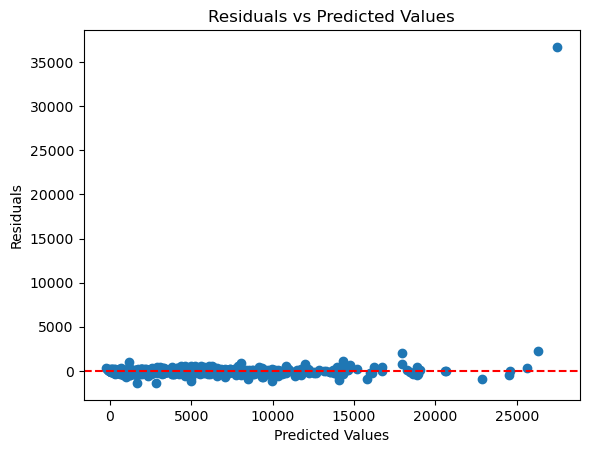

In [111]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()


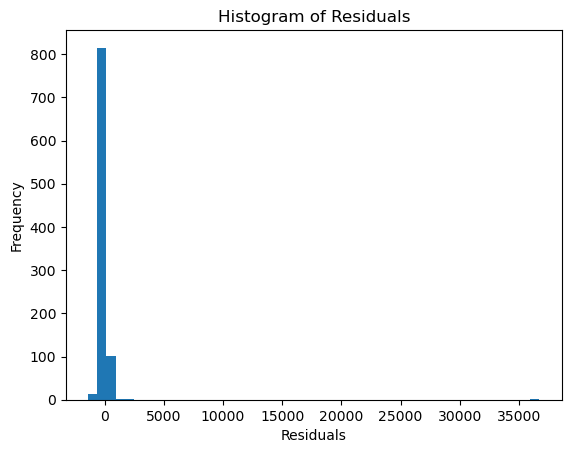

In [112]:
plt.hist(residuals, bins=50)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

#### There is an outlier in the dataset, which might be influencing the model. To remove that outlier, we will identifyt he data point using the residual. 

In [114]:
# Calculate residuals
residuals = y_test - y_pred

# Find the index of the most extreme residual
outlier_index = np.argmax(np.abs(residuals))
print(f"Outlier index: {outlier_index}, Residual value: {residuals.iloc[outlier_index]}")


Outlier index: 894, Residual value: 36721.8596875


In [115]:
print(X_test.iloc[outlier_index])
print("Actual value:", y_test.iloc[outlier_index])
print("Predicted value:", y_pred[outlier_index])

listing_price         0.00
sale_price          159.95
discount              0.00
rating                4.70
reviews             223.00
brand_Adidas          0.00
brand_Nike            1.00
budget_Average        0.00
budget_Budget         1.00
budget_Elite          0.00
budget_Expensive      0.00
Name: 100, dtype: float64
Actual value: 64203.93
Predicted value: 27482.07


In [116]:
# Remove outlier from test set
X_test_cleaned = X_test.drop(index=X_test.index[outlier_index])
y_test_cleaned = y_test.drop(index=y_test.index[outlier_index])

# Predict again
y_pred_cleaned = best_model.predict(X_test_cleaned)

# Evaluate again
from sklearn.metrics import mean_squared_error, r2_score

rmse_cleaned = np.sqrt(mean_squared_error(y_test_cleaned, y_pred_cleaned))
r2_cleaned = r2_score(y_test_cleaned, y_pred_cleaned)

print(f"New RMSE (without outlier): {rmse_cleaned}")
print(f"New R² (without outlier): {r2_cleaned}")


New RMSE (without outlier): 231.88147555262165
New R² (without outlier): 0.9968027276618816


#### Removing the outlier has significantly reduced the RMSE value.

Let's chaeck the residuals again

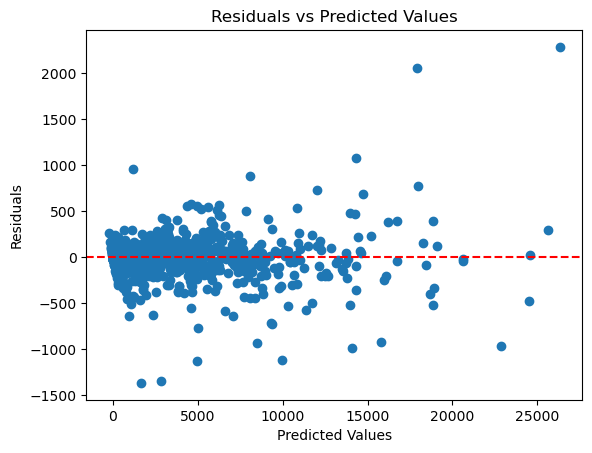

In [117]:
residuals = y_test_cleaned - y_pred_cleaned
plt.scatter(y_pred_cleaned, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

Improved model performance and the residual plot indicate that the outlier was actually influencing the model performane. Hence, to remedy that we will remove the outlier formt he original dataseta and then retrain the model and evaluate.

In [119]:
# Get the index in the original dataset (assuming X_test came from a split of df)
original_index = X_test.index[outlier_index]

# Drop from original dataset
X = X.drop(index=original_index)
y = y.drop(index=original_index)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [120]:
best_model = xgb.XGBRegressor(**grid_search.best_params_, random_state=42)
best_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.1, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [121]:
y_pred = best_model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Final RMSE (after removing outlier and retraining): {rmse}")
print(f"Final R² Score: {r2}")

Final RMSE (after removing outlier and retraining): 295.28389667952695
Final R² Score: 0.9951297672092343


## SUMMARY
In summary, after cleaning and preprocessing the data, the data was labeled based on listing price categories, and the average revenue and number of products for each brand and each category were calculated. The relationship between the length of description and the number of reviews and average ratings was analyzed, and it was found that for descriptions 200-500 characters long, the average rating was between 3.2-3.4. For descriptions that were 100 characters or less, the average rating was very bad. It should also be noted that the descriptions that were longer than 500 characters have a rating either above 3.6 or below 3.2. There was a direct relationship between description length and number of reviews. The predictive models were developed to predict the revenue and the results were compared based on the RMSE values of the models. The performance of the Random Forest model for predicting revenue was much better compared to the Linear Regression model as the former had a lower RMSE value.

## RECOMMENDATIONS:
1. Utilize categorized pricing tiers based on the quartile bins as stated above, and strategically segment product pricing to optimize revenue. Focus on aligning pricing with consumer perception of value across different product categories to maximize profitability.

2. Utilize insights from the analysis of review lengths and ratings to craft optimized product descriptions. Target the optimal length range identified (200-500 characters) to ensure favorable ratings and customer engagement while avoiding excessively lengthy descriptions that may deter customers.

3. Utilize predictive modeling insights to develop targeted marketing campaigns. Segment audiences based on their sales price and no. of reviews each product gets, tailoring messaging and promotions accordingly